In [1]:
import pandas as pd

In [2]:
instancesHeader = ['GRAPH', 'SOURCE', 'TARGET', 'K']

instancesDf = pd.read_csv('allInstances.csv', delimiter=' ', header=None, names=instancesHeader)
instancesDf

,GRAPH,SOURCE,TARGET,K
0,USA-road-dt.BAY.gr,16543,55889,10
1,USA-road-dt.BAY.gr,283434,63730,10
2,USA-road-dt.BAY.gr,121364,296103,10
3,USA-road-dt.BAY.gr,95977,317967,10
4,USA-road-dt.BAY.gr,111879,174884,10
...,...,...,...,...
19795,USA-road-dt.W.gr,5403904,1040213,1000000
19796,USA-road-dt.W.gr,2995822,4018166,1000000
19797,USA-road-dt.W.gr,513901,3174123,1000000
19798,USA-road-dt.W.gr,2071445,835264,1000000


In [4]:
newAlgoHeader = ['ALGO', 'GRAPH', 'SOURCE', 'TARGET', 'K', 'TIME', 'COST_MIN', 'COST_MAX', 'SOLUTIONS', 'BDA_QUERIES', 'FAILED_BDA', 'EXPANSIONS_PER_BDA', 'EXPANSIONS_PER_FAILED_BDA', 'POOL_SIZE']

newAlgoDf = pd.read_csv('finalRoadResults_na.csv', delimiter=';', header=None, names=newAlgoHeader)
newAlgoDf[newAlgoDf['SOURCE']==50681]
#print(newAlgoDf[newAlgoDf['SOURCE']==55147].to_string())
#print(newAlgoDf.to_string())

,ALGO,GRAPH,SOURCE,TARGET,K,TIME,COST_MIN,COST_MAX,SOLUTIONS,BDA_QUERIES,FAILED_BDA,EXPANSIONS_PER_BDA,EXPANSIONS_PER_FAILED_BDA,POOL_SIZE
1963,NaN,USA-road-dt.BAY.gr,50681,264047,10,0.097,1193803,1193803,10,9,0,200,0.0,1200
2157,NaN,USA-road-dt.BAY.gr,50681,264047,100,0.071,1193803,1193864,100,171,35,70,58.0,1200
2407,NaN,USA-road-dt.BAY.gr,50681,264047,1000,0.221,1193803,1194061,1000,1959,459,53,61.0,1200
2588,NaN,USA-road-dt.BAY.gr,50681,264047,5000,15.306,1193803,1194266,5000,9935,2622,48,18343.0,236600
2803,NaN,USA-road-dt.BAY.gr,50681,264047,10000,37.584,1193803,1194350,10000,19959,5350,46,22465.0,236600
3010,NaN,USA-road-dt.BAY.gr,50681,264047,50000,252.567,1193803,1194585,50000,99935,28427,42,29576.0,236600
3193,NaN,USA-road-dt.BAY.gr,50681,264047,100000,544.079,1193803,1194698,100000,199819,57707,41,31215.0,236600


In [5]:
kurzHeader = ['ALGO', 'OPTIMISTIC', 'DUMMY', 'PRUNING', 'NODES', 'ARCS', 'SOURCE' , 'TARGET', 'K', 'SOLUTIONS', 'COST_MIN', 'COST_MAX', 'SUM_OF_COSTS', 'SP_TREES', 'SP_TREES_EXPANSIONS', 'TIME']

kurzDf = pd.read_csv('finalRoadResults_kurz.csv', delimiter=';', header=None, names=kurzHeader)
kurzDf

,ALGO,OPTIMISTIC,DUMMY,PRUNING,NODES,ARCS,SOURCE,TARGET,K,SOLUTIONS,COST_MIN,COST_MAX,SUM_OF_COSTS,SP_TREES,SP_TREES_EXPANSIONS,TIME
0,kurz,optimistic,NaN,distance-pruning,264346,733846,10992,81728,10,10,888792,888837,8888026,4,342028,0.215
1,kurz,optimistic,NaN,distance-pruning,264346,733846,155780,208552,10,10,236001,236165,2360722,3,125210,0.081
2,kurz,optimistic,NaN,distance-pruning,264346,733846,223946,33429,10,10,505019,505019,5050190,1,166544,0.074
3,kurz,optimistic,NaN,distance-pruning,264346,733846,263856,247037,10,10,123472,123928,1237778,8,32980,0.028
4,kurz,optimistic,NaN,distance-pruning,264346,733846,107275,82809,10,10,879593,879641,8796212,1,165769,0.074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10275,kurz,optimistic,NaN,distance-pruning,14081816,34292496,2889670,8122560,100000,100000,8894506,8894506,889450600000,1,4541321,4145.450
10276,kurz,optimistic,NaN,distance-pruning,14081816,34292496,1377692,1737915,100000,100000,6406562,6406564,640656318080,1,4361498,4261.820
10277,kurz,optimistic,NaN,distance-pruning,14081816,34292496,11038006,8245378,100000,100000,2233878,2233954,223392393536,16386,2071672,4415.540
10278,kurz,optimistic,NaN,distance-pruning,14081816,34292496,7228136,11312825,100000,100000,13352210,13352210,1335221000000,1,5183583,4305.970


In [9]:
mergedDf = pd.merge(instancesDf, newAlgoDf, on=['GRAPH', 'SOURCE', 'TARGET', 'K'], how='left')
mergedDf = pd.merge(mergedDf, kurzDf, on=['SOURCE', 'TARGET', 'K'], how='left', suffixes=("_na", "_kurz"))
mergedDf = mergedDf.loc[mergedDf['TIME_kurz'].notna() | mergedDf['TIME_na'].notna()]
mergedDf

,GRAPH,SOURCE,TARGET,K,ALGO_na,TIME_na,COST_MIN_na,COST_MAX_na,SOLUTIONS_na,BDA_QUERIES,...,PRUNING,NODES,ARCS,SOLUTIONS_kurz,COST_MIN_kurz,COST_MAX_kurz,SUM_OF_COSTS,SP_TREES,SP_TREES_EXPANSIONS,TIME_kurz
0,USA-road-dt.BAY.gr,16543,55889,10,NaN,0.122,223575.0,224097.0,10.0,17.0,...,distance-pruning,321270.0,800172.0,10.0,223575.0,224097.0,2.238986e+06,8.0,56523.0,0.023
1,USA-road-dt.BAY.gr,283434,63730,10,NaN,0.128,1437008.0,1437008.0,10.0,9.0,...,distance-pruning,321270.0,800172.0,10.0,1437008.0,1437008.0,1.437008e+07,1.0,310073.0,0.122
2,USA-road-dt.BAY.gr,121364,296103,10,NaN,0.115,1368332.0,1368420.0,10.0,17.0,...,distance-pruning,321270.0,800172.0,10.0,1368332.0,1368420.0,1.368380e+07,1.0,227830.0,0.082
3,USA-road-dt.BAY.gr,95977,317967,10,NaN,0.113,1336800.0,1336828.0,10.0,15.0,...,distance-pruning,321270.0,800172.0,10.0,1336800.0,1336828.0,1.336809e+07,1.0,190407.0,0.046
4,USA-road-dt.BAY.gr,111879,174884,10,NaN,0.092,1092027.0,1092030.0,10.0,15.0,...,distance-pruning,321270.0,800172.0,10.0,1092027.0,1092030.0,1.092028e+07,1.0,167453.0,0.065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16195,USA-road-dt.NY.gr,55756,57664,1000000,NaN,96.978,646737.0,647783.0,1000000.0,1989311.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16196,USA-road-dt.NY.gr,201045,125079,1000000,NaN,77.551,558213.0,558671.0,1000000.0,1990851.0,...,distance-pruning,264346.0,733846.0,1000000.0,558213.0,558671.0,5.586053e+11,26045.0,29182754.0,304.203
16197,USA-road-dt.NY.gr,56931,252603,1000000,NaN,159.541,954328.0,954444.0,1000000.0,1983351.0,...,distance-pruning,264346.0,733846.0,1000000.0,954328.0,954444.0,9.544224e+11,1.0,256576.0,1278.820
16198,USA-road-dt.NY.gr,177073,104477,1000000,NaN,80.508,640491.0,641032.0,1000000.0,1995831.0,...,distance-pruning,264346.0,733846.0,1000000.0,640491.0,641032.0,6.409680e+11,28685.0,36586255.0,307.902


In [7]:
mergedDf.loc[(mergedDf['TIME_kurz'] < mergedDf['TIME_na']) & (mergedDf['K'] > 100), ['GRAPH', 'SOURCE', 'TARGET', 'K', 'FAILED_BDA', 'TIME_na', 'TIME_kurz', 'COST_MAX_kurz', 'COST_MAX_na', 'SP_TREES', 'FAILED_BDA', 'EXPANSIONS_PER_FAILED_BDA']]

,GRAPH,SOURCE,TARGET,K,FAILED_BDA,TIME_na,TIME_kurz,COST_MAX_kurz,COST_MAX_na,SP_TREES,FAILED_BDA,EXPANSIONS_PER_FAILED_BDA
421,USA-road-dt.BAY.gr,5834,14356,1000,551.0,4.776,0.581,168972.0,168972.0,6.0,551.0,28003.0
459,USA-road-dt.BAY.gr,11021,244281,1000,617.0,23.795,4.448,648759.0,648759.0,71.0,617.0,146425.0
463,USA-road-dt.BAY.gr,127800,199526,1000,656.0,40.274,4.689,1718389.0,1718389.0,1.0,656.0,168101.0
475,USA-road-dt.BAY.gr,181337,147574,1000,588.0,8.805,5.749,580670.0,580670.0,240.0,588.0,48986.0
497,USA-road-dt.BAY.gr,286785,127005,1000,636.0,2.164,0.412,1473854.0,1473854.0,1.0,636.0,8465.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15584,USA-road-dt.NY.gr,27516,95495,50000,26534.0,28.722,16.005,395544.0,395544.0,6794.0,26534.0,186.0
15784,USA-road-dt.NY.gr,27516,95495,100000,54610.0,72.535,35.542,395666.0,395666.0,14867.0,54610.0,471.0
15801,USA-road-dt.NY.gr,155780,208552,500000,293649.0,596.749,208.379,237312.0,237312.0,32197.0,293649.0,30.0
15804,USA-road-dt.NY.gr,107275,82809,500000,289121.0,764.831,152.732,880396.0,880396.0,7304.0,289121.0,230.0


In [10]:
from scipy.stats import gmean
mergedDf.loc[mergedDf['TIME_kurz'].isna(), 'TIME_kurz'] = 7200
mergedDf.loc[mergedDf['TIME_na'].isna(), 'TIME_na'] = 7200
mergedDf['SPEEDUP'] = mergedDf['TIME_kurz']/mergedDf['TIME_na']
#mergedDf = mergedDf.loc[(mergedDf['TIME_kurz'] < mergedDf['TIME_na']) & (mergedDf['K'] > 100)]
#testDf = mergedDf[mergedDf['TIME_kurz'] >= mergedDf['TIME_na']]
print("K       & KM SOLVED  & KM DIJKSTRAS & KM TIME & NA SOLVED & BDA SSP & BDA SSP Fail & Iterations Success & Iterations Fail & NA Time & SPEEDUP\\\\")
for graphName, graphDf in mergedDf.groupby(by='GRAPH'):
    print("\midrule\n")
    print(graphName.split('.')[-2])
    print("\midrule\n")
    for pathsCount, pathsCountDf in graphDf.groupby(by='K'):
        averageSpeedup = gmean(pathsCountDf[pathsCountDf['SPEEDUP'].notna()]['SPEEDUP'])
        dijkstraPolls = gmean(pathsCountDf[pathsCountDf['SOLUTIONS_kurz'].notna()]['SP_TREES'])
        #print(len(pathsCountDf[pathsCountDf['TIME_na'].notna()]))
        lenNa = len(pathsCountDf[pathsCountDf['SOLUTIONS_na'].notna()])
        lenKurz = len(pathsCountDf[pathsCountDf['SOLUTIONS_kurz'].notna()])
        timeKurz = gmean(pathsCountDf[pathsCountDf['TIME_kurz'].notna()]['TIME_kurz'])
        timeNa = gmean(pathsCountDf[pathsCountDf['TIME_na'].notna()]['TIME_na'])
        bdaQueries = gmean(pathsCountDf[pathsCountDf['SOLUTIONS_na'].notna()]['BDA_QUERIES'])
        failedBdaQueries = gmean(pathsCountDf.loc[(pathsCountDf['SOLUTIONS_na'].notna()) & (pathsCountDf['FAILED_BDA']>0), 'FAILED_BDA'])
        expansionsPerSuccess = gmean(pathsCountDf[pathsCountDf['SOLUTIONS_na'].notna()]['EXPANSIONS_PER_BDA'])
        expansionsPerFail = gmean(pathsCountDf.loc[(pathsCountDf['SOLUTIONS_na'].notna()) & (pathsCountDf['FAILED_BDA']>0), 'EXPANSIONS_PER_FAILED_BDA'])
        print(f'{pathsCount:7d} &{lenKurz:10d} &{dijkstraPolls:10.0f} &{timeKurz:10.2f} &{lenNa:10} &{bdaQueries:10.0f} &{failedBdaQueries:10.0f} &{expansionsPerSuccess:20.0f} &{expansionsPerFail:20.0f} &{timeNa:10.2f} &{averageSpeedup:8.2f}\\\\')

K       & KM SOLVED  & KM DIJKSTRAS & KM TIME & NA SOLVED & BDA SSP & BDA SSP Fail & Iterations Success & Iterations Fail & NA Time & SPEEDUP\\
\midrule

BAY
\midrule

     10 &       200 &         2 &      0.07 &       200 &        14 &         3 &                 215 &                 168 &      0.10 &    0.71\\
    100 &       200 &         6 &      0.20 &       200 &       189 &        50 &                 182 &                 144 &      0.12 &    1.67\\
   1000 &       200 &        67 &      2.00 &       200 &      1961 &       520 &                 145 &                 134 &      0.30 &    6.70\\
   5000 &       198 &       439 &     11.17 &       200 &      9868 &      2650 &                 128 &                 123 &      0.96 &   11.63\\
  10000 &       190 &       847 &     23.18 &       200 &     19758 &      5303 &                 122 &                 119 &      1.70 &   13.60\\
  50000 &       151 &      3598 &    170.32 &       199 &     98883 &     26579 &           

/home/bzfmaris/develop/kshortestpaths/results/venv/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/bzfmaris/develop/kshortestpaths/results/venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/tmp/ipykernel_14931/3754726228.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


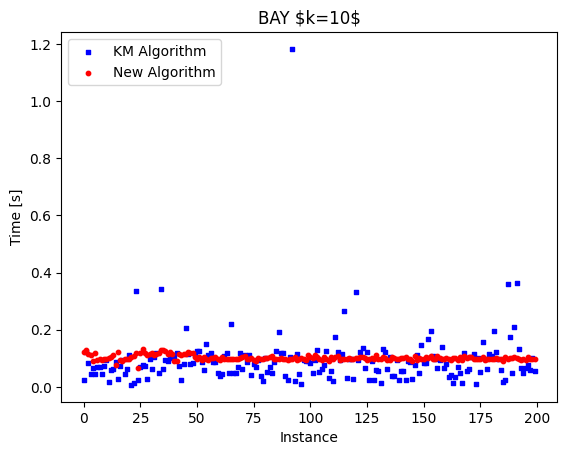

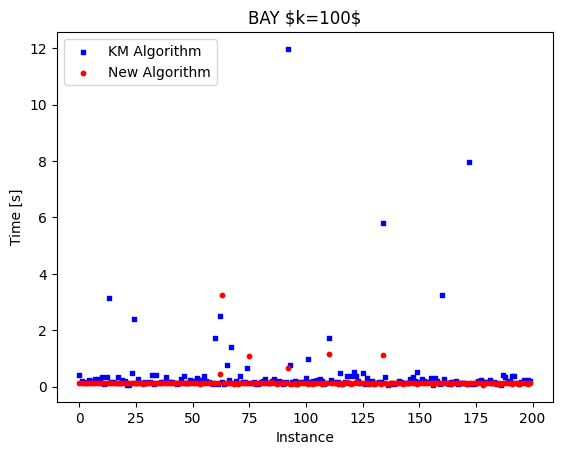

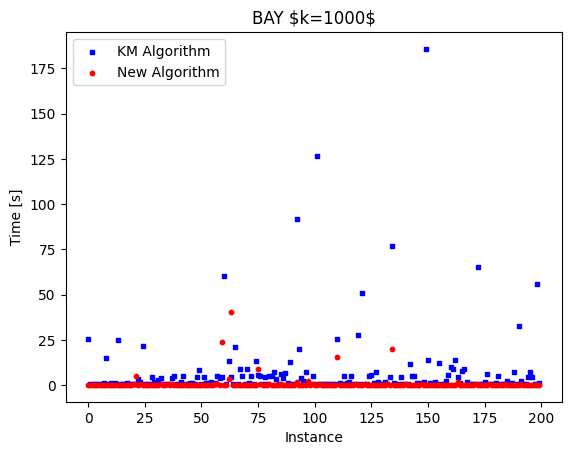

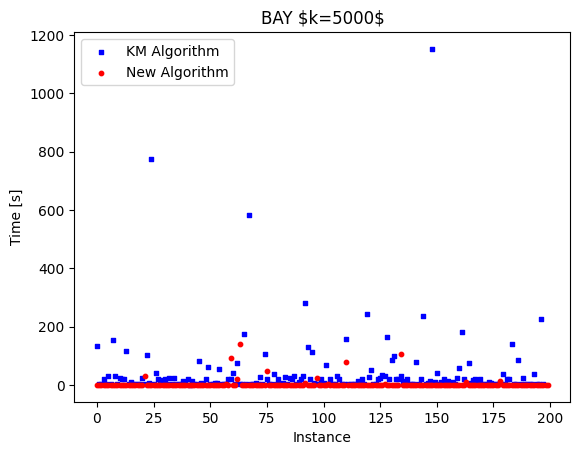

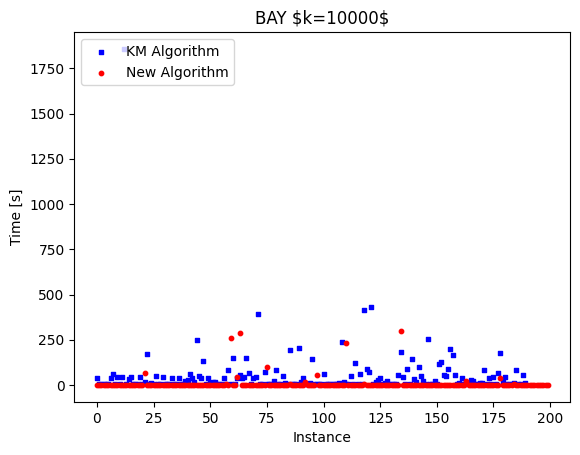

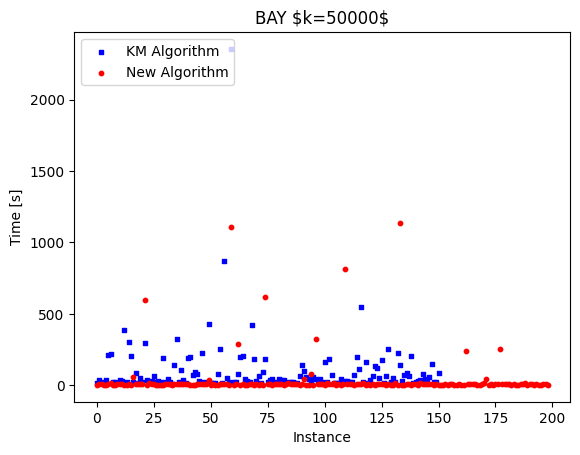

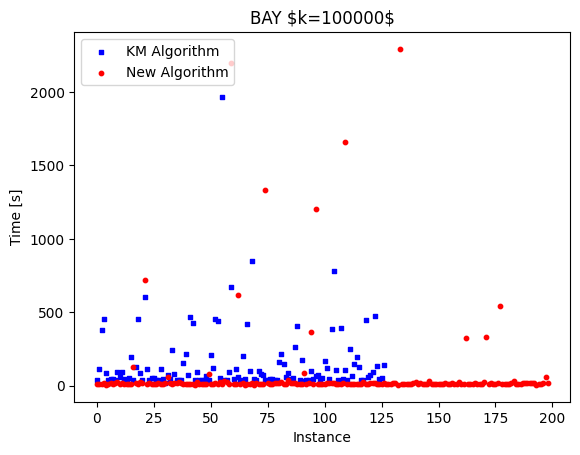

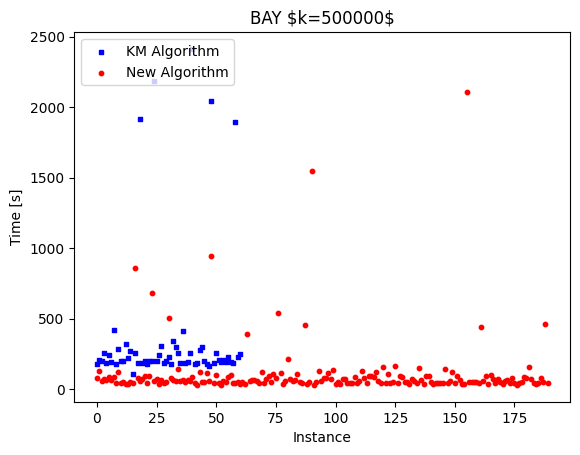

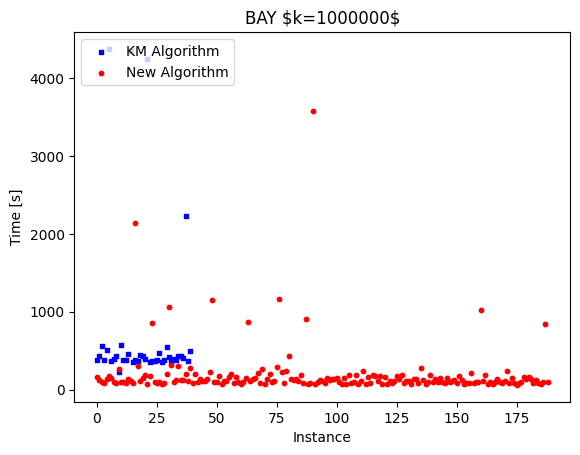

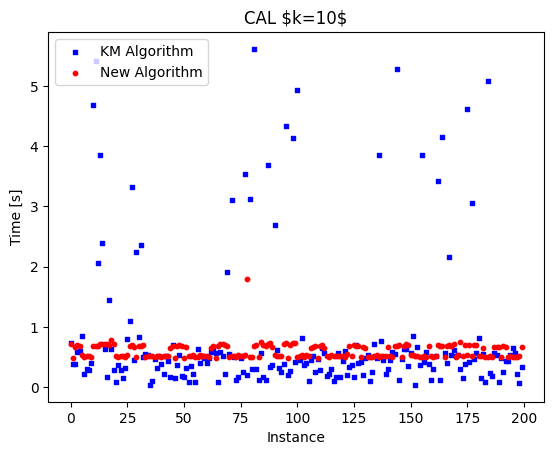

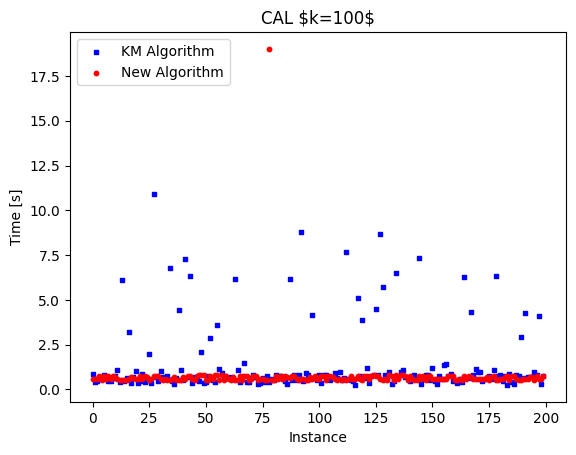

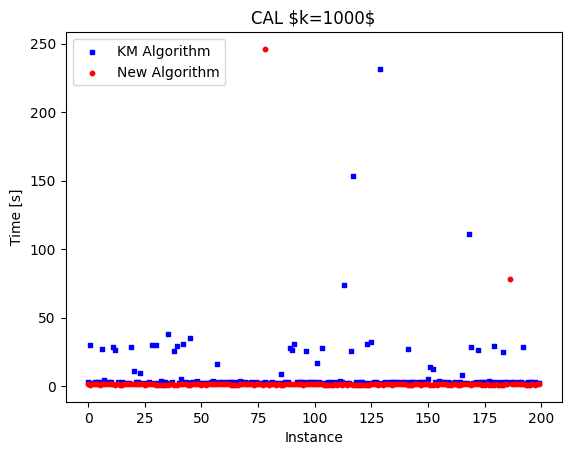

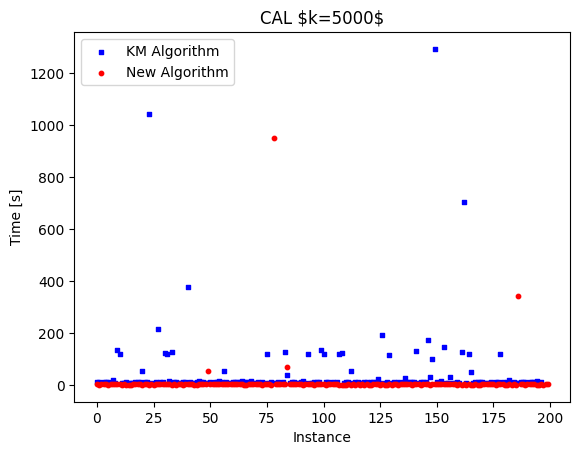

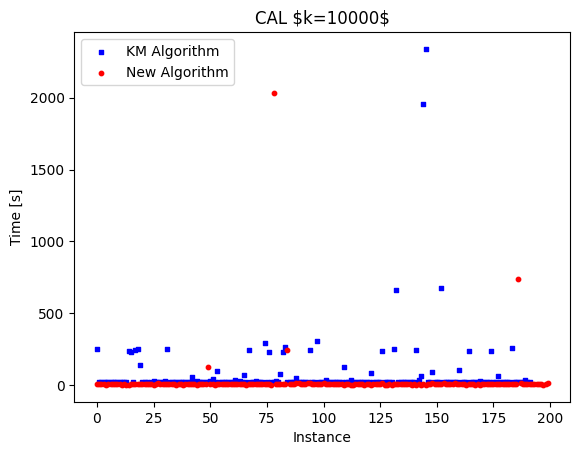

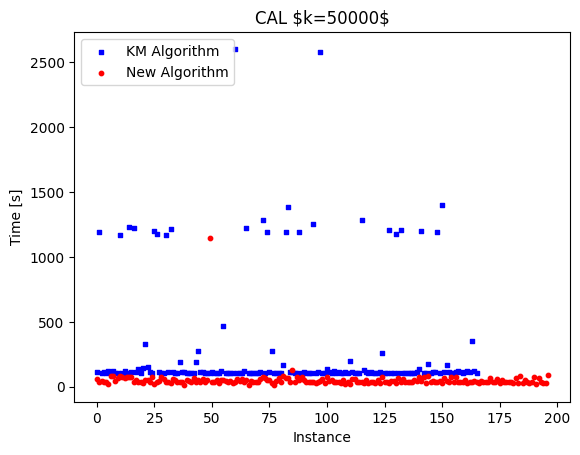

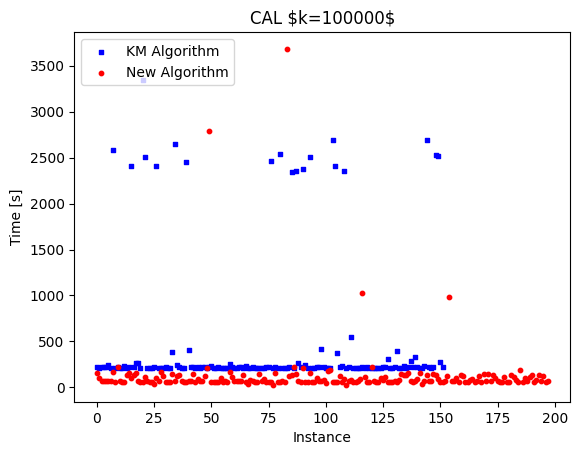

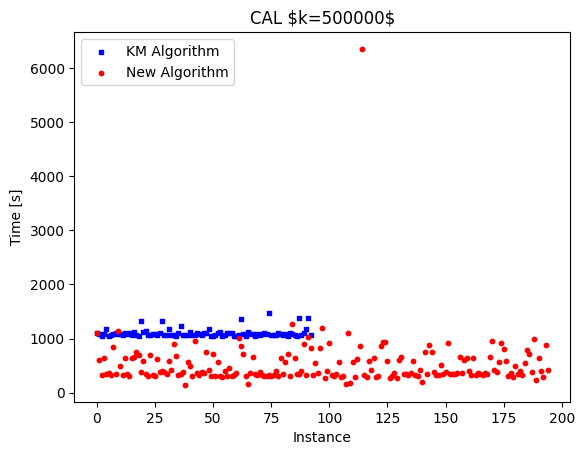

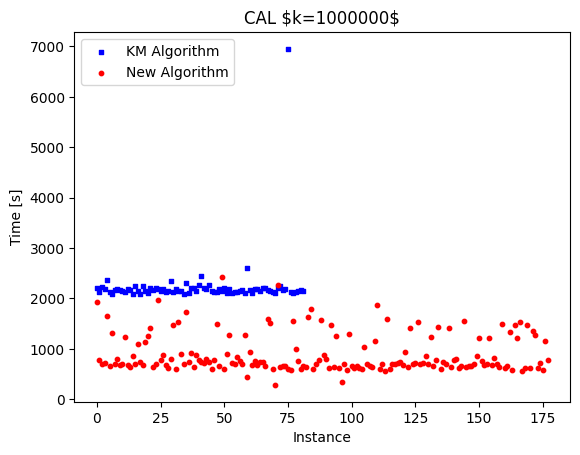

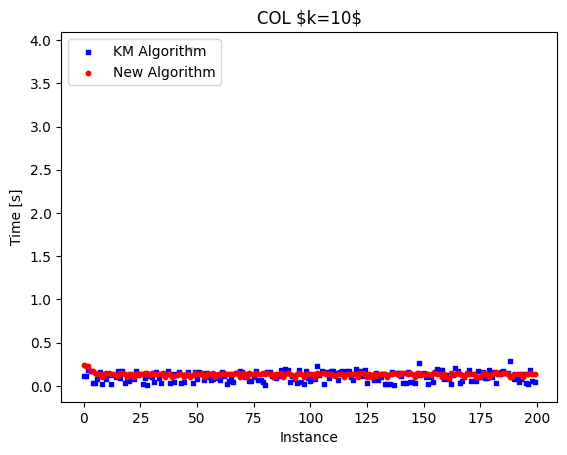

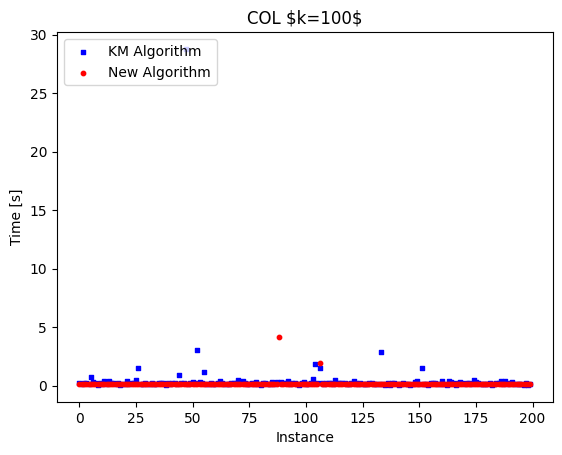

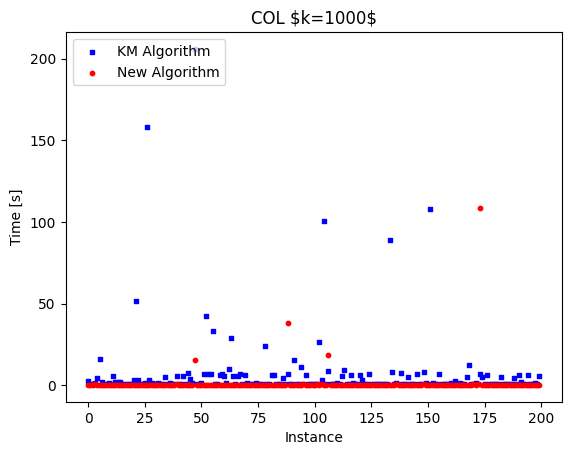

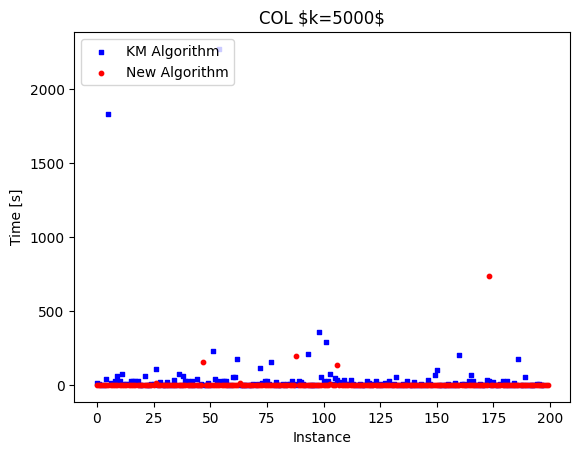

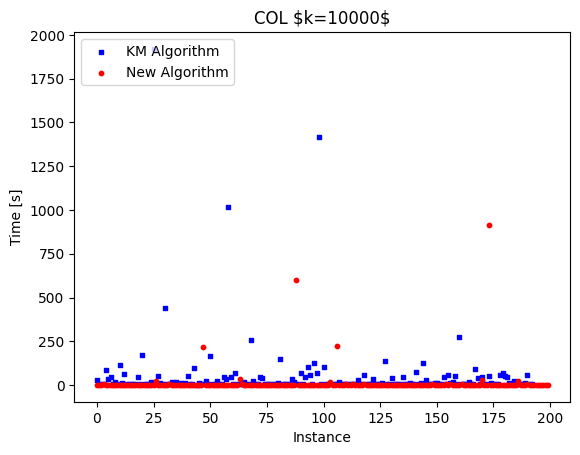

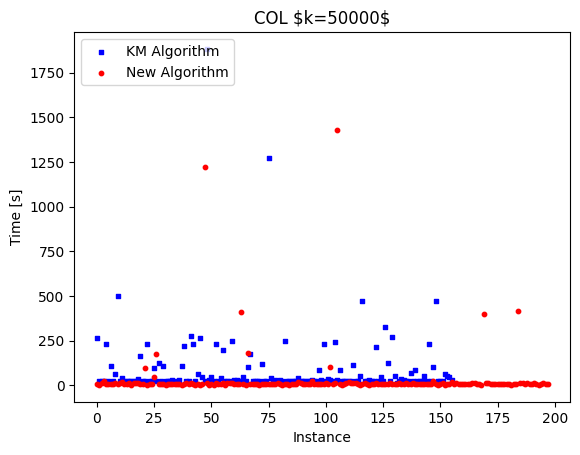

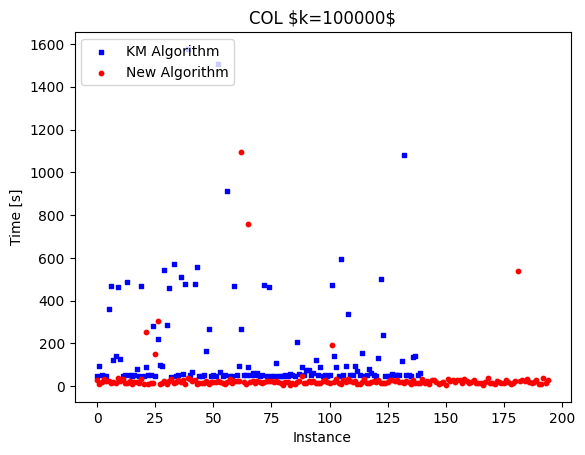

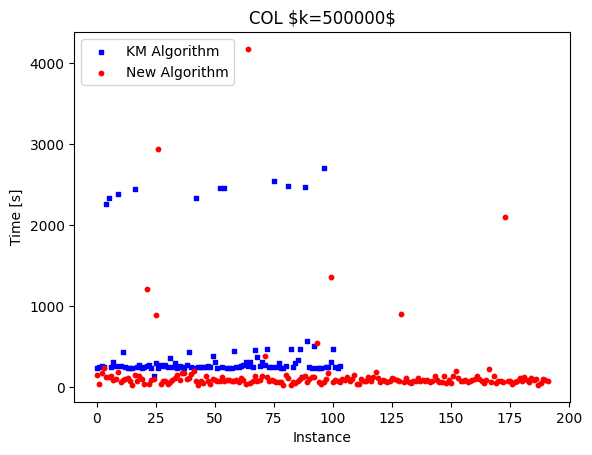

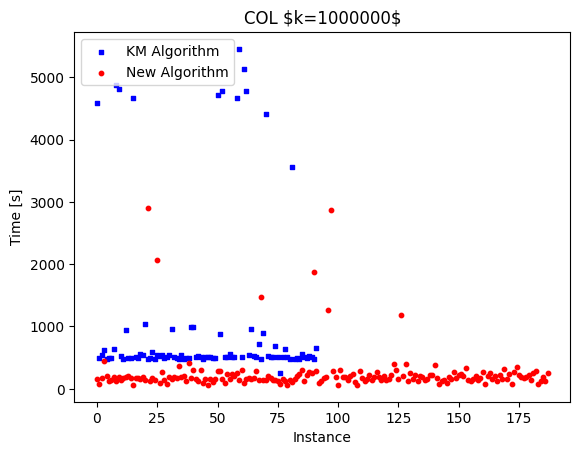

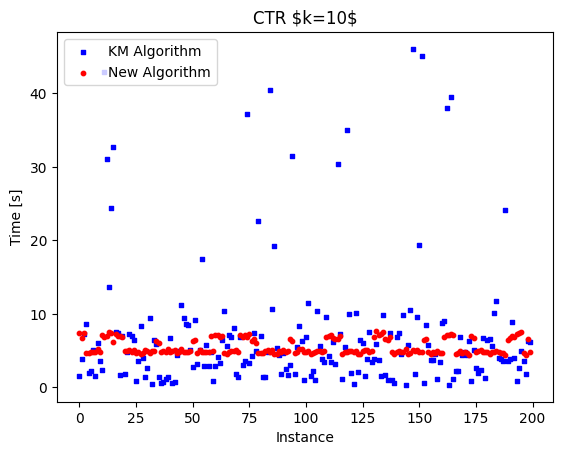

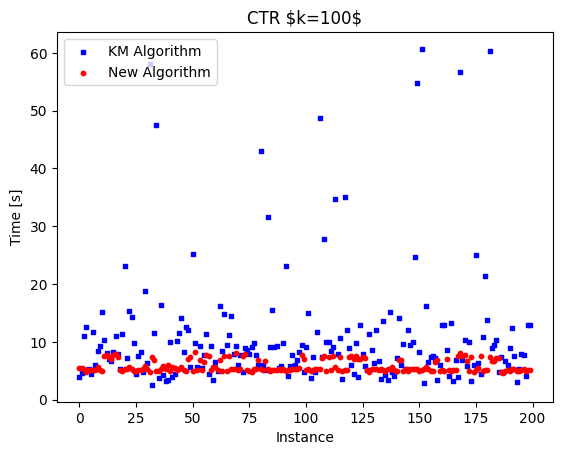

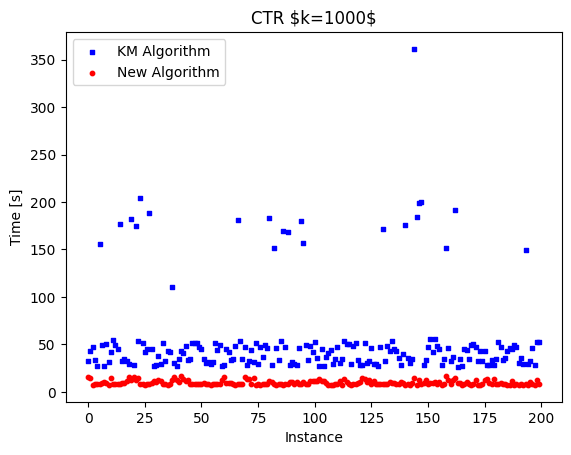

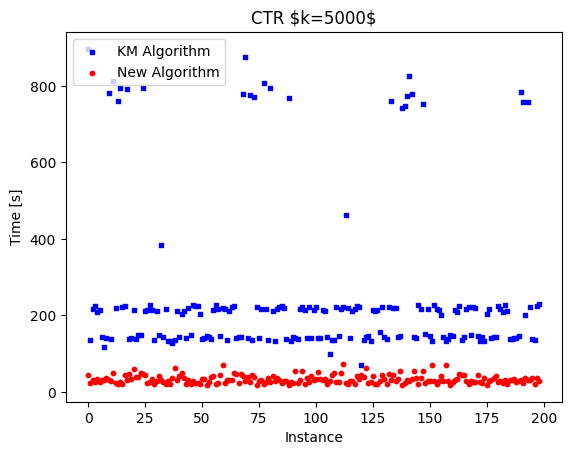

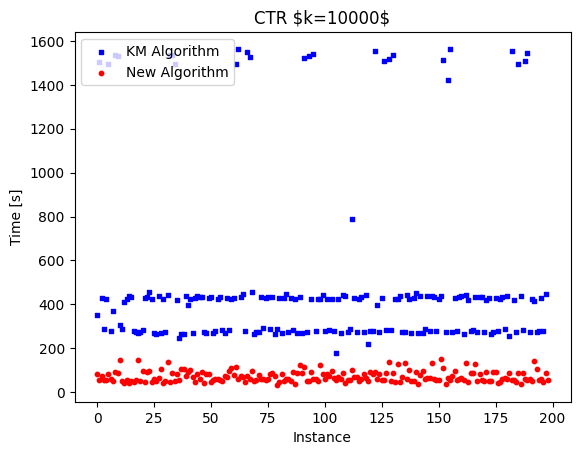

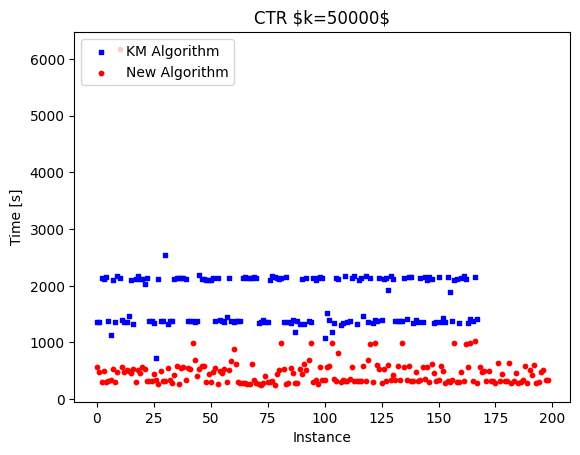

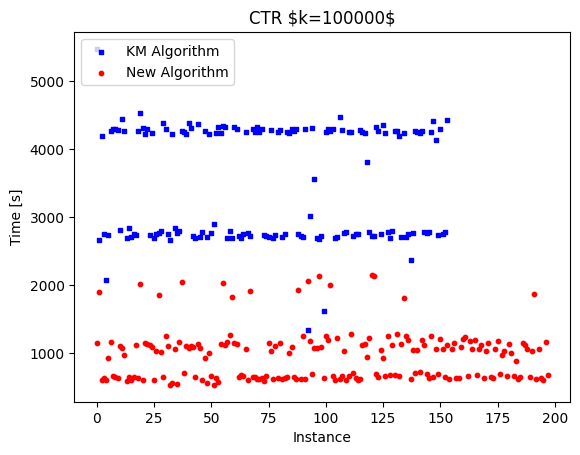

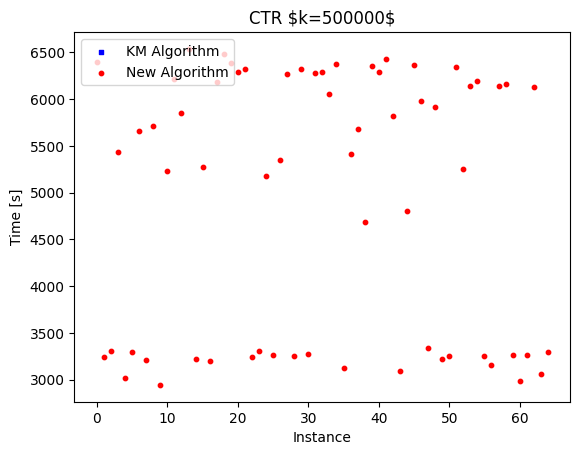

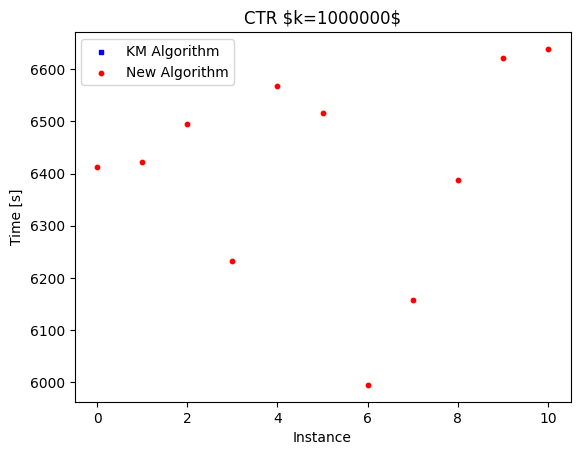

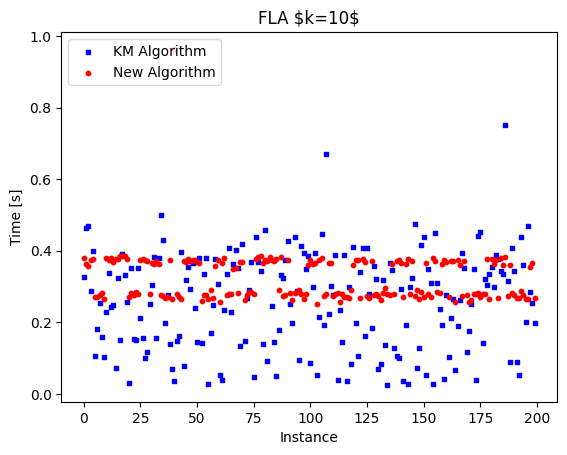

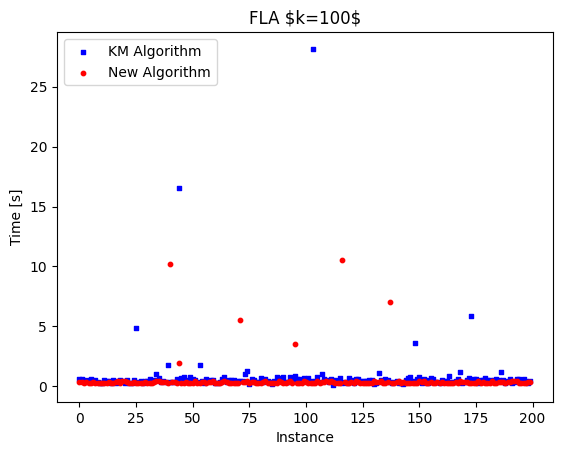

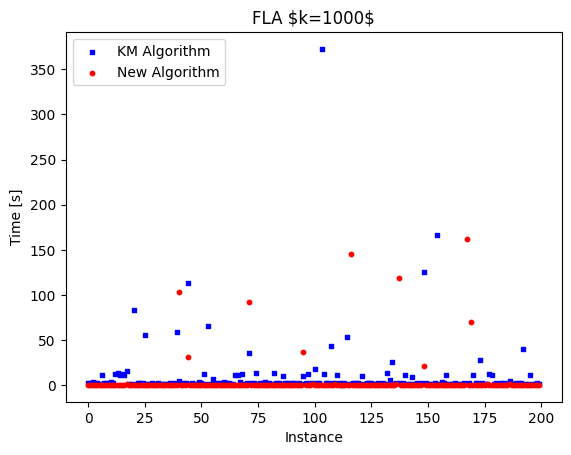

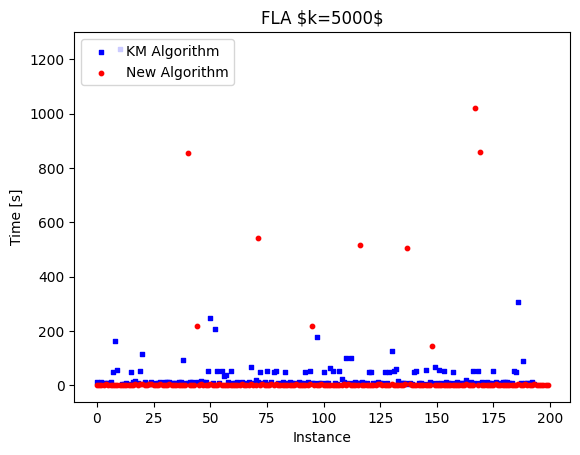

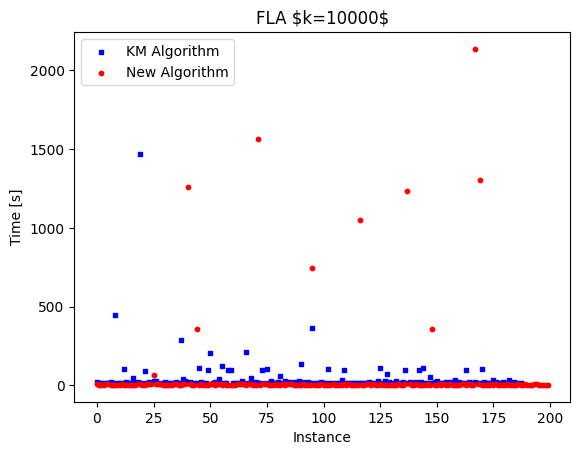

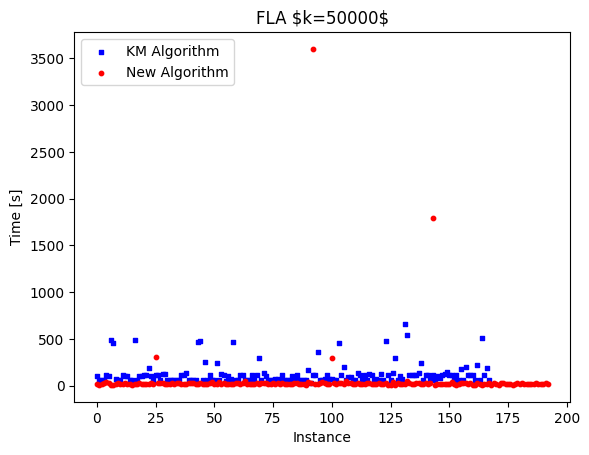

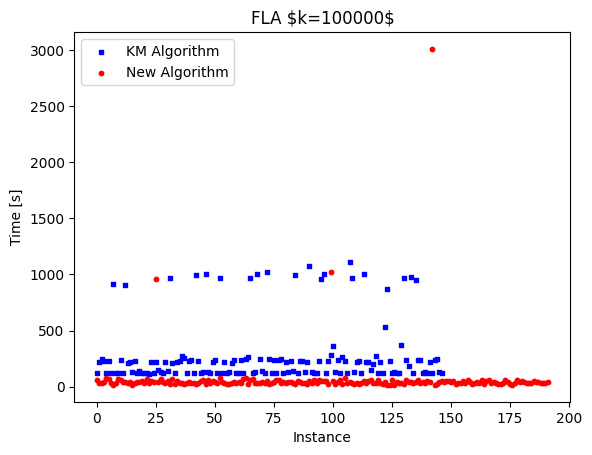

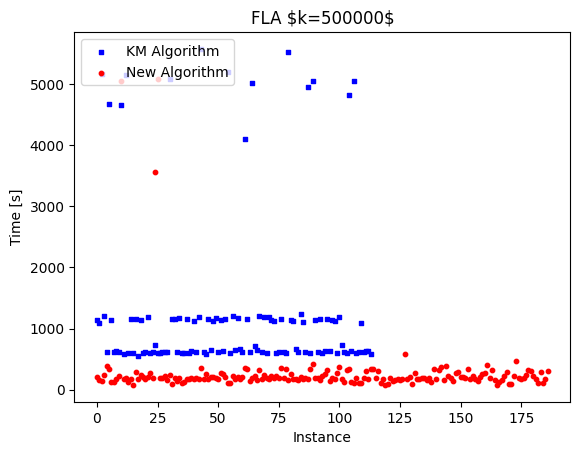

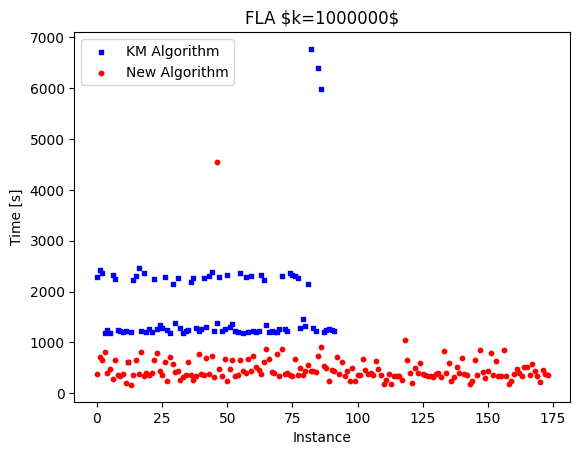

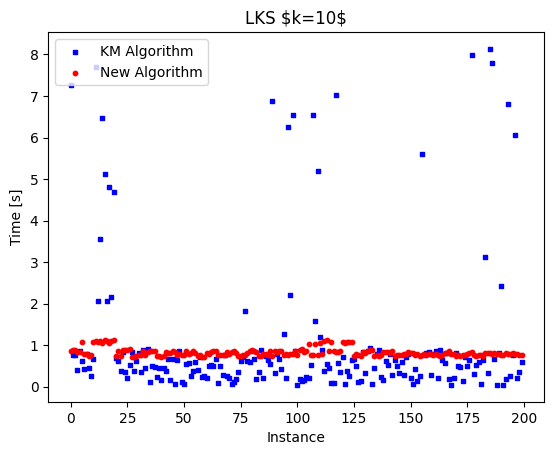

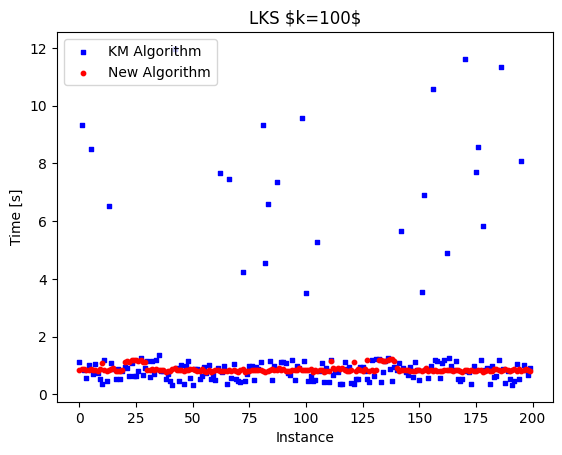

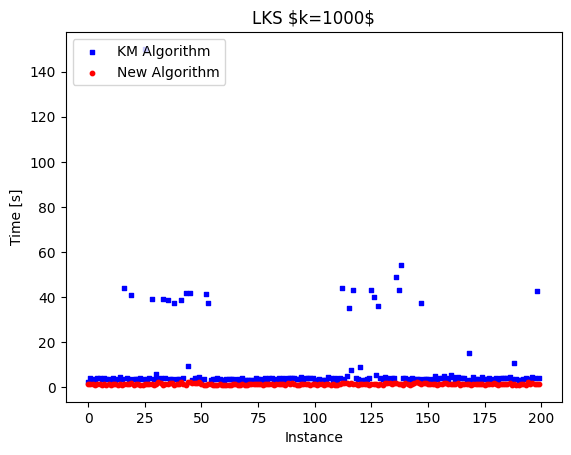

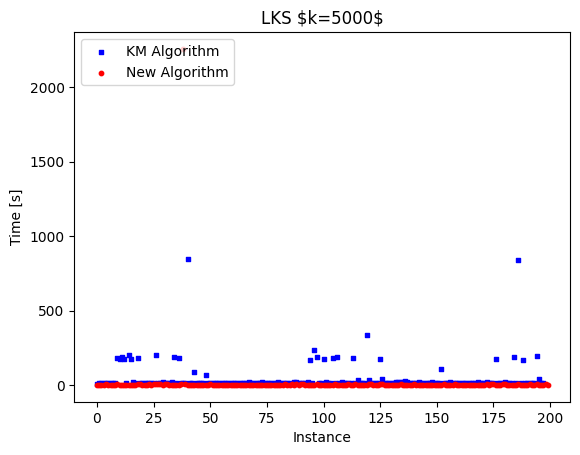

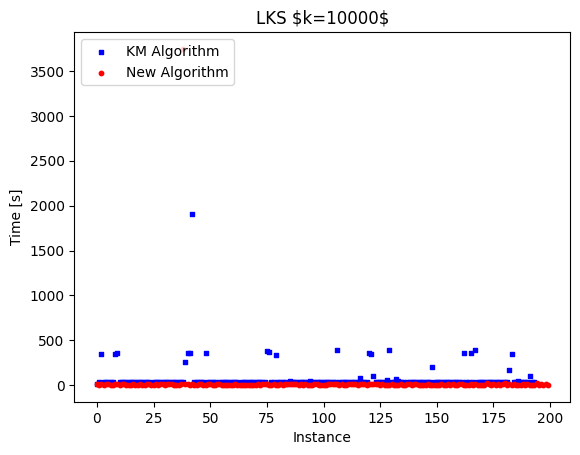

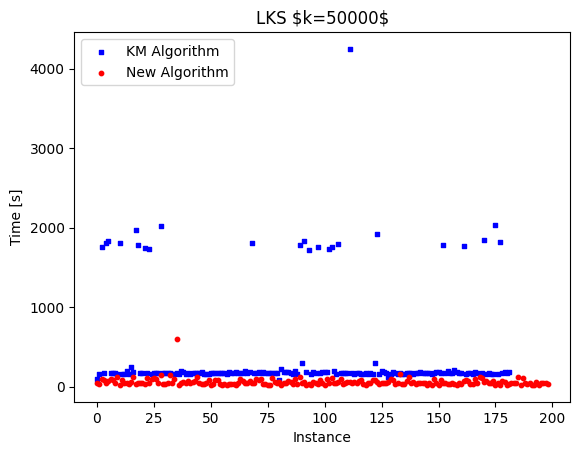

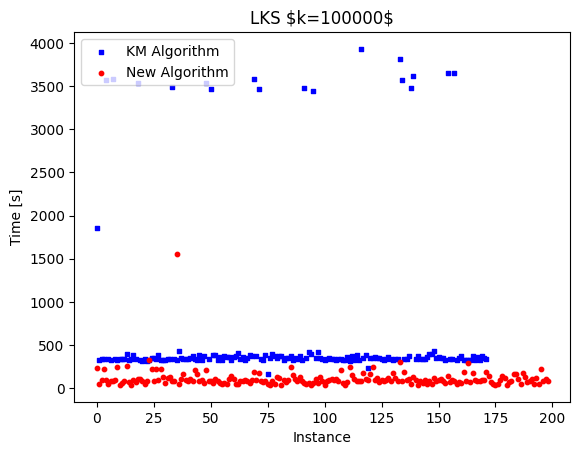

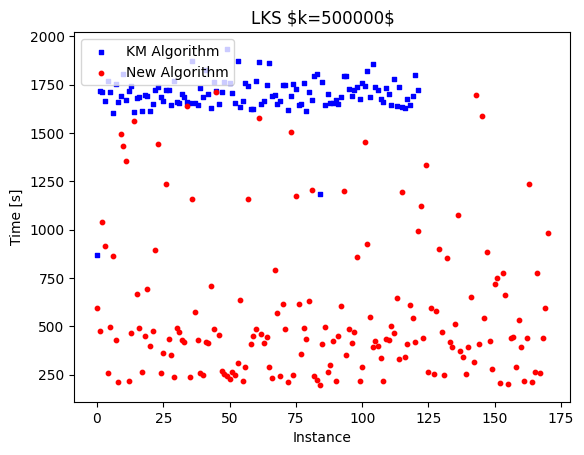

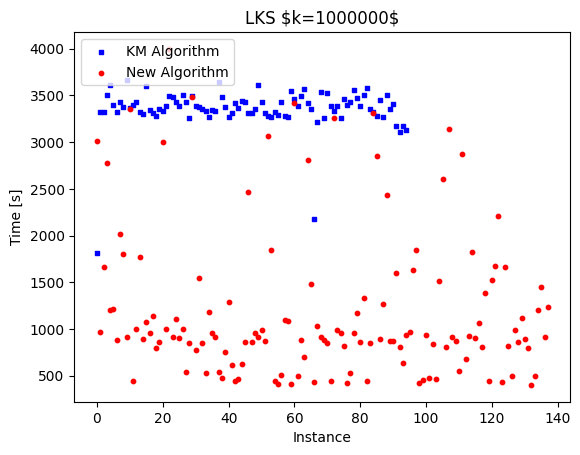

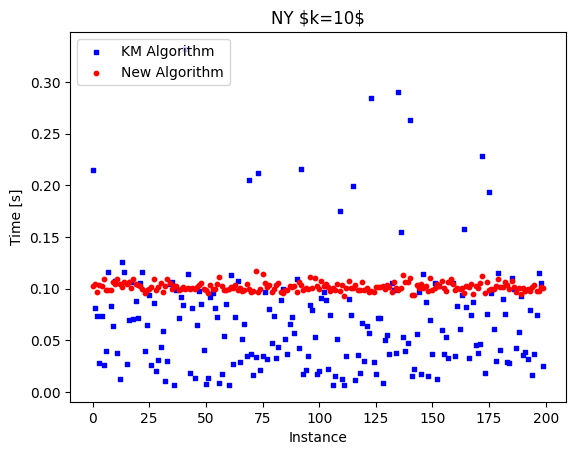

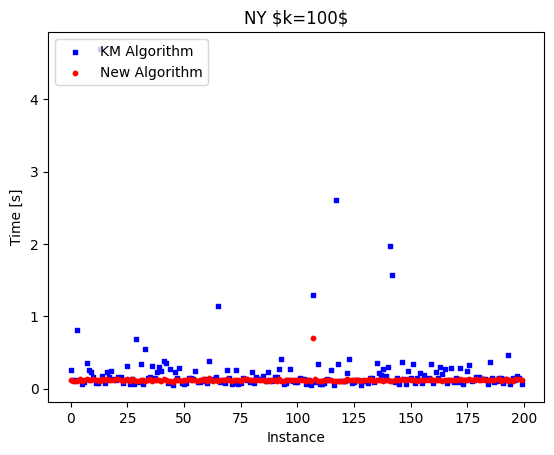

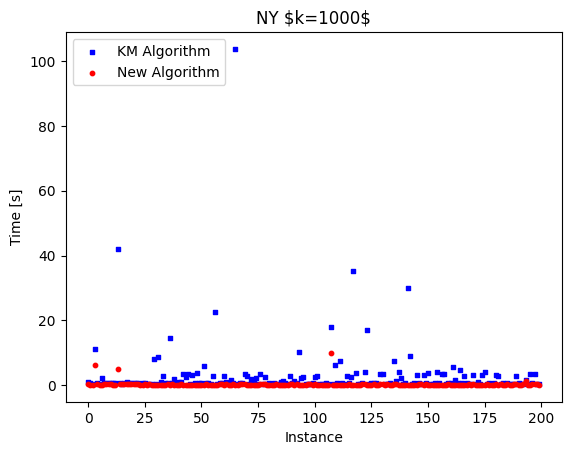

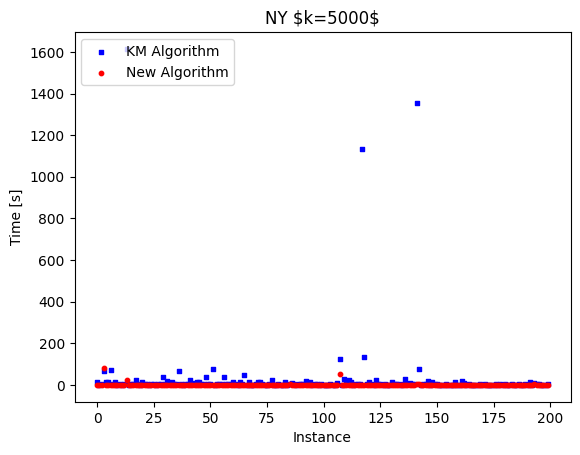

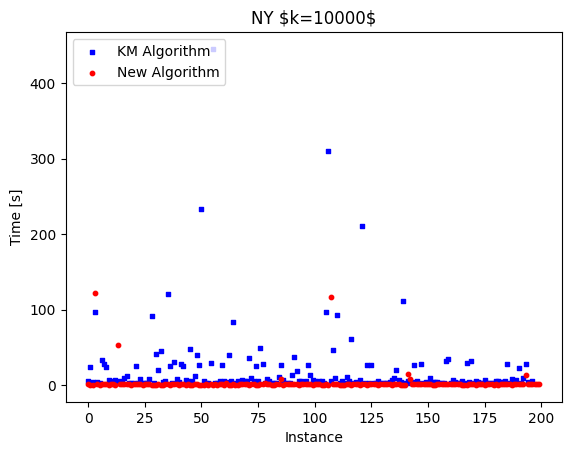

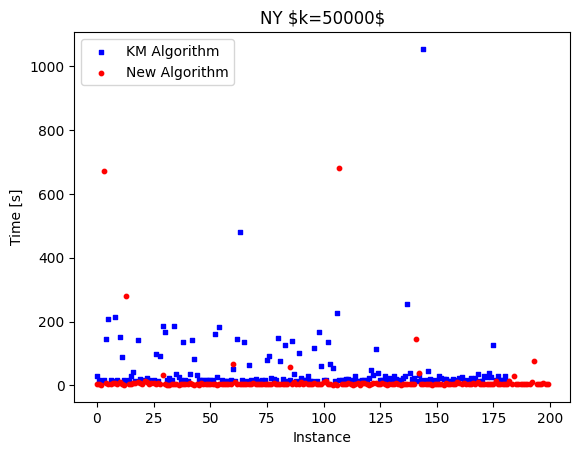

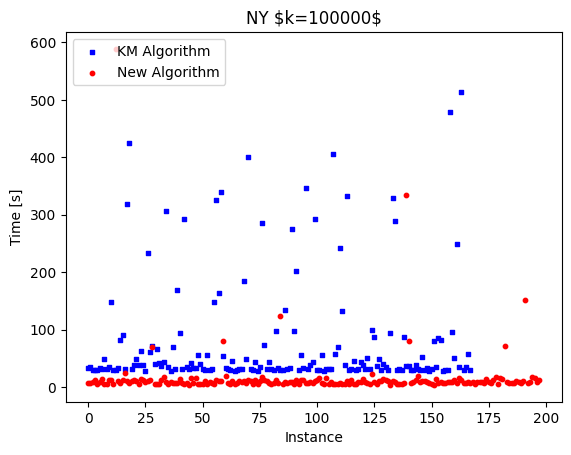

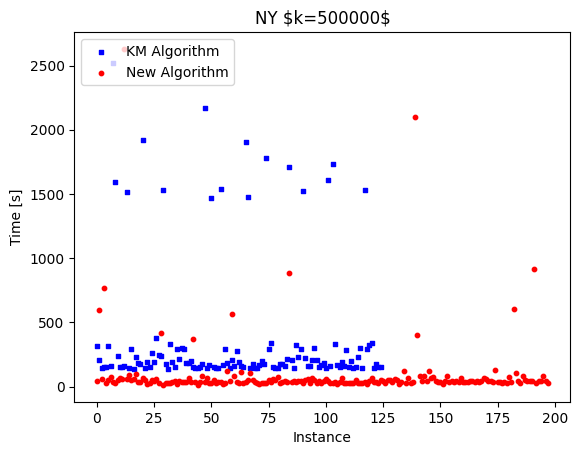

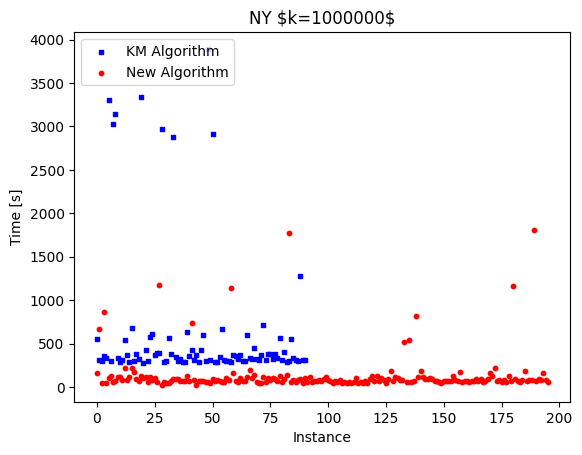

In [26]:
import matplotlib.pyplot as plt

for graphName, graphDf in mergedDf.groupby(by='GRAPH'):
    name = graphName.split('.')[-2]
    for pathsCount, pathsCountDf in graphDf.groupby(by='K'):
        kurz = list(pathsCountDf[pathsCountDf['SOLUTIONS_kurz'].notna()]['TIME_kurz'])
        xKurz = list(range(len(kurz)))
        newAlgo = list(pathsCountDf[pathsCountDf['SOLUTIONS_na'].notna()]['TIME_na'])
        xNewAlgo = list(range(len(newAlgo)))
        fig = plt.figure()
        ax1 = fig.add_subplot(111)

        ax1.scatter(xKurz, kurz, s=10, c='b', marker="s", label='KM Algorithm')
        ax1.scatter(xNewAlgo, newAlgo, s=10, c='r', marker="o", label='New Algorithm')
        plt.ylabel('Time [s]')
        plt.xlabel('Instance')
        plt.legend(loc='upper left')
        plt.title(f'{name} \$k={pathsCount}\$')
        plt.savefig(f'./plots/road-{name}-{pathsCount}.svg')
        #plt.show()